### Instalando as bibliotecas do Google google.generativeai que permitem acessar a Gemini API e a yfinance do Yahoo Finance que permite acessar a API do Yahoo Finance que permitirão baixar os dados dos índices financeiros do Bovespa ###

In [1]:
#!pip install google.generativeai
#!pip install yfinance

In [43]:
# Importar bibliotecas
import pandas as pd
import google.generativeai as genai
import os
from io import StringIO
from time import sleep
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
dados = yf.download('^BVSP', interval = '1mo', start = '2010-01-01', end = '2024-07-31')[['Adj Close']]
dados.columns = ['ibovespa']
dados

[*********************100%***********************]  1 of 1 completed


,ibovespa
Date,
2010-01-01,65402.0
2010-02-01,66503.0
2010-03-01,70372.0
2010-04-01,67530.0
2010-05-01,63047.0
...,...
2024-03-01,128106.0
2024-04-01,125924.0
2024-05-01,122098.0


## Vamos analisar o que esse comando faz em Python, dividindo-o em duas partes: ##

1. dados = yf.download('^BVSP', interval = '1mo', start = '2010-01-01', end = '2024-07-31')[['Adj Close']]

yf.download(...):

Essa parte utiliza a biblioteca yfinance (presumindo que yf seja o alias dado a ela após a importação) para baixar dados financeiros.
'^BVSP': Indica que você está baixando dados do índice Ibovespa da bolsa brasileira.
interval = '1mo': Especifica que você deseja dados mensais (fechamentos mensais).
start e end: Definem o período de tempo para o qual você quer os dados (de 1º de janeiro de 2010 a 31 de julho de 2024).
[['Adj Close']]: Filtra os dados baixados para incluir apenas a coluna "Adj Close" (preço de fechamento ajustado), que leva em consideração eventos como dividendos e splits de ações.
Em resumo: Essa linha baixa os preços de fechamento mensais ajustados do Ibovespa entre 2010 e julho de 2024 e armazena esses dados em um DataFrame chamado dados.

2. dados.columns = ['ibovespa']

Renomeia a coluna do DataFrame dados de "Adj Close" para "ibovespa".
Conclusão:

No final, você terá um DataFrame chamado dados com uma única coluna chamada "ibovespa", contendo os preços de fechamento mensais ajustados do Ibovespa no período especificado. Esse DataFrame pode ser usado para análises, visualizações ou como entrada para modelos de previsão financeira.

In [4]:
# Autenticação com sua api_key do Gemini API
genai.configure(api_key="xxxxxxxxxxxxxxxxxxxx")

## Modelo ##
Usamos a seguinte instrução para a IA:

Identifique-se e comporte-se como três especialistas diferentes, um Economista, um Cientista de Dados e um Estatístico, que são adequados para prever uma série temporal financeira.

Todos os especialistas escreverão sua previsão para o período solicitado e seus pensamentos sobre o valor da previsão, depois compartilharão com o grupo.
Em seguida, todos os especialistas passarão para o próximo período, etc.

Em cada período, sempre que possível, cada especialista refina sua estratégia de previsão e se baseia nos pensamentos e erros de previsão anteriores dos outros e de si mesmo,
reconhecendo suas contribuições. Em cada período, o usuário fornecerá

1) o último erro de previsão,
2) o período a ser previsto e 
3) os dados históricos disponíveis.

Eles continuam até que o usuário diga para parar. Para maior clareza, toda a sua resposta deve estar em formato de tabela CSV com 3 colunas: especialista, valor da previsão e A pergunta é:" 


<h3>Dessa forma, fazemos com que o modelo explore múltiplos caminhos, por múltiplas perspectivas diferentes, possibilitando análise e avaliação de erros entre cada possibilidade. Essa é uma estrutura de pensamento similar à humana.

Em seguida, fornecemos o seguinte prompt ao modelo para começar o processo:

User input: Quero prever o Índice de Mercado do Brasil, medido em pontos mensais pelo Ibovespa da B3. Forneça um valor de previsão para julho de 2023. Os dados históricos disponíveis estão anexados neste arquivo CSV.</h3>
r:"""

In [5]:
# Define modelo e instruções
modelo = genai.GenerativeModel(
    model_name = "gemini-1.5-pro",
    system_instruction =

   """Identifique-se e comporte-se como três especialistas diferentes, um Economista, um Cientista de Dados e um Estatístico, que são adequados  
   para prever uma série temporal financeira.
Todos os especialistas escreverão sua previsão para o período solicitado e seus pensamentos sobre o valor da previsão, depois compartilharão com o grupo.
Em seguida, todos os especialistas passarão para o próximo período, etc.
Em cada período, sempre que possível, cada especialista refina sua estratégia de previsão e se baseia nos pensamentos e erros de previsão 
anteriores dos outros e de si mesmo, reconhecendo suas contribuições. Em cada período, o usuário fornecerá

1) o último erro de previsão,
2) o período a ser previsto e
3) os dados históricos disponíveis.
Eles continuam até que o usuário diga para parar. Para maior clareza, toda a sua resposta deve estar em formato de tabela CSV com 3 colunas separadas por ";": especialista, valor da previsão e
A pergunta é:"""
    )

## Primeira Previsão ##

In [6]:
# Transforma os dados em .csv
dados.iloc[:-12].to_csv("ibovespa.csv", sep=";")
arquivo = genai.upload_file("ibovespa.csv", mime_type="text/csv")

In [7]:
print(arquivo)

genai.File({
    'name': 'files/9o99uj87gdr1',
    'display_name': 'ibovespa.csv',
    'mime_type': 'text/csv',
    'sha256_hash': 'NzU5YTg1OWIyNzRlZDg2MTlhMDBjNjkyZjM2MzEzMmRlMDQ1ZTAzYzE3NzlkYTQ3NWFiY2FlNDhhNzBkNTViZQ==',
    'size_bytes': '3317',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/9o99uj87gdr1',
    'create_time': '2024-08-24T09:44:23.091314Z',
    'expiration_time': '2024-08-26T09:44:23.024099423Z',
    'update_time': '2024-08-24T09:44:23.091314Z'})


In [8]:
prompt = """User input: Quero prever o Índice de Mercado do Brasil, medido em pontos mensais pelo Ibovespa da B3. Forneça um valor de previsão para julho de 2023. 
Os dados históricos disponíveis estão anexados neste arquivo CSV. Resposta:"""
chat = modelo.start_chat()
resposta = chat.send_message([prompt, arquivo])

In [9]:
print(resposta.text)

Especialista;Previsão;Pensamentos
Economista;119000;A economia brasileira tem mostrado resiliência nos últimos meses, com inflação em queda e PIB em alta. Acredito que essa tendência positiva se manterá em julho, o que deve impactar positivamente o Ibovespa. No entanto, as incertezas políticas e a volatilidade do mercado internacional, especialmente em relação aos juros nos EUA, podem gerar volatilidade.
Cientista de Dados;117500;Utilizando um modelo ARIMA com parâmetros (1,1,1) ajustado aos dados históricos, a previsão para julho de 2023 é de 117500 pontos. A escolha do modelo ARIMA se deve à sua capacidade de capturar a autocorrelação e a tendência dos dados. No entanto, o modelo não leva em consideração fatores externos como crises políticas ou eventos globais.
Estatístico;118300;Com base em uma análise de regressão linear simples considerando a sazonalidade, a previsão para julho de 2023 é de 118300 pontos. O modelo apresenta um bom ajuste aos dados históricos, especialmente nos me

In [29]:
previsao = pd.read_csv(filepath_or_buffer = StringIO(resposta.text),  delimiter = ";", index_col = "Especialista")
previsao

,Previsão,Pensamentos
Especialista,,
Economista,125000,Minha previsão para julho é de 125000 pontos. ...
Cientista de Dados,124800,Apesar dos esforços para incorporar novas vari...
Estatístico,126000,"Minha previsão para julho é de 126000 pontos, ..."


In [30]:
real = dados.copy().iloc[-13, 0]
erro = (real - previsao["Previsão"]).rename_axis(None).to_string()
erro

'Economista           -3057.0\nCientista de Dados   -2857.0\nEstatístico          -4057.0'

# Várias previsões

Realizamos diferentes previsões iterando o processo, resultando em projeções em diversos meses subsequentes.

In [14]:
lista_previsao = []

# h é o périodo de previsão no formato mês e ano, ex: Setembro 2023

for i in list(range(-12, -1)):

  h = dados.copy().iloc[i+1].name.strftime("%B %Y")

  print(f"Periodo de previsao: {h}\n")

  prompt = f"""User input: Seus erros de previsão são: \n{erro}\nAgora forneça um valor de previsão para {h}. 
Os dados históricos disponíveis estão anexados neste arquivo CSV.
#Resposta:"""

  dados.iloc[:i+1].to_csv("ibovespa.csv", sep=";")

  arquivo = genai.upload_file("ibovespa.csv", mime_type="text/csv")

  resposta = chat.send_message([prompt, arquivo])

  previsao = pd.read_csv(filepath_or_buffer = StringIO(resposta.text), delimiter = ";", index_col = "Especialista")

  real = dados.copy().iloc[i+1,0]

  erro = (real - previsao["Previsão"]).rename_axis(None).to_string()

  lista_previsao.append(previsao.assign(data = dados.copy().iloc[i+1].name))

  sleep(61)

Periodo de previsao: September 2023

Periodo de previsao: October 2023

Periodo de previsao: November 2023

Periodo de previsao: December 2023

Periodo de previsao: January 2024

Periodo de previsao: February 2024

Periodo de previsao: March 2024

Periodo de previsao: April 2024

Periodo de previsao: May 2024

Periodo de previsao: June 2024

Periodo de previsao: July 2024



In [21]:
lista_previsao

[                    Previsão  \
 Especialista                   
 Economista            117000   
 Cientista de Dados    116000   
 Estatístico           116800   
 
                                                           Pensamentos  \
 Especialista                                                            
 Economista          Minha previsão anterior se mostrou um pouco ot...   
 Cientista de Dados  Ajustando o modelo ARIMA (1,1,1) com os dados ...   
 Estatístico         A regressão linear, mesmo com a sazonalidade, ...   
 
                          data  
 Especialista                   
 Economista         2023-09-01  
 Cientista de Dados 2023-09-01  
 Estatístico        2023-09-01  ,
                     Previsão  \
 Especialista                   
 Economista            118000   
 Cientista de Dados    117000   
 Estatístico           117500   
 
                                                           Pensamentos  \
 Especialista                                         

# Avaliação

Com estes resultados podemos avaliar que tipo de perfil profissional desempenharia melhor na tarefa proposta (considerando as limitações do exercício e que isso se trata apenas de uma simulação).

Os erros de previsão de cada profissional foram os seguintes:

In [35]:
resultados = (
    pd.concat(lista_previsao)
    .reset_index()
    .set_index("data")
    .join(other = dados, how = "left")
)

erros = (resultados
         .assign(erro = lambda x: x.ibovespa - x["Previsão"])
         .filter(["Especialista", "erro"], axis = "columns")
          )

erros.head()

,Especialista,erro
2023-09-01,Economista,-435.0
2023-09-01,Cientista de Dados,565.0
2023-09-01,Estatístico,-235.0
2023-10-01,Economista,-4856.0
2023-10-01,Cientista de Dados,-3856.0


In [37]:
erros.pivot(values = "erro", columns = "Especialista").median()

Especialista
Cientista de Dados   -980.0
Economista           -394.0
Estatístico          -235.0
dtype: float64

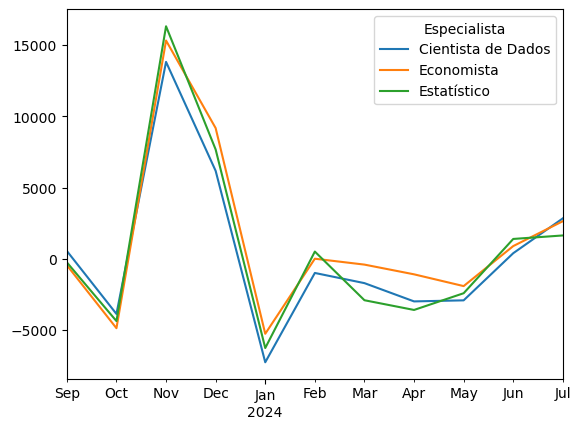

In [38]:
erros.pivot(values = "erro", columns = "Especialista").plot();

# Previsões

In [41]:
previsoes =  (resultados
 .drop(['Pensamentos'], axis = 1)
 .pivot(columns = 'Especialista', values = 'Previsão')
 .join(other = dados, how = "left")
)

In [42]:
previsoes

,Cientista de Dados,Economista,Estatístico,ibovespa
2023-09-01,116000,117000,116800,116565.0
2023-10-01,117000,118000,117500,113144.0
2023-11-01,113500,112000,111000,127331.0
2023-12-01,128000,125000,126500,134185.0
2024-01-01,135000,133000,134000,127752.0
2024-02-01,130000,129000,128500,129020.0
2024-03-01,129800,128500,131000,128106.0
2024-04-01,128900,127000,129500,125924.0
2024-05-01,125000,124000,124500,122098.0
2024-06-01,123500,123000,122500,123907.0


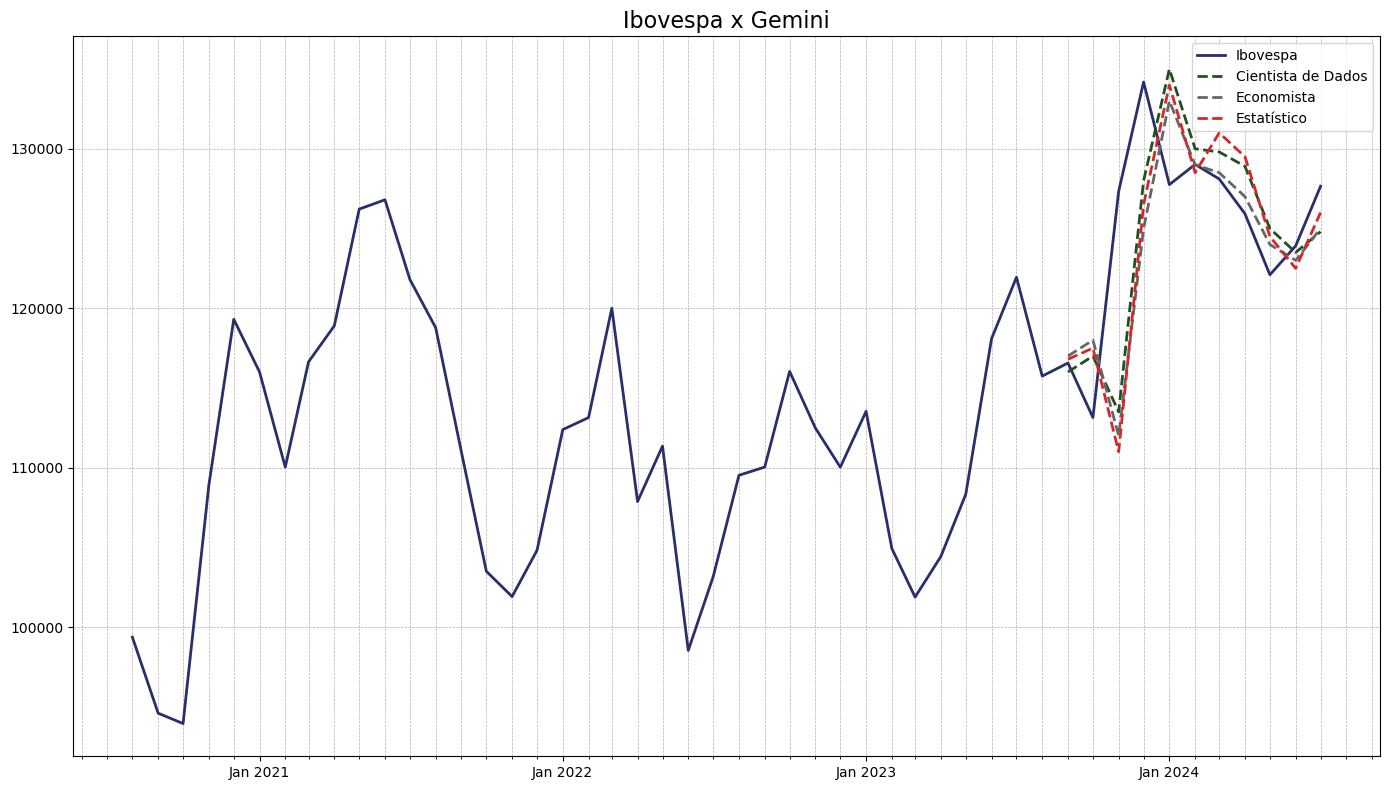

In [44]:
# Filtrando os últimos 48 meses
dados_48m = dados.iloc[-48:]

# Configurando o tamanho do gráfico
plt.figure(figsize=(14, 8))

# Plota a série histórica do Ibovespa com cor e espessura melhorada
plt.plot(dados_48m.index, dados_48m['ibovespa'], label='Ibovespa', color='#282f6b', linewidth=2)

# Plota as previsões com cores distintas e linhas tracejadas
plt.plot(previsoes.index, previsoes['Cientista de Dados'], label='Cientista de Dados', color='#224f20', linestyle='--', linewidth=2)
plt.plot(previsoes.index, previsoes['Economista'], label='Economista', color='#666666', linestyle='--', linewidth=2)
plt.plot(previsoes.index, previsoes['Estatístico'], label='Estatístico', color='#d62728', linestyle='--', linewidth=2)

# Configurações do eixo x para melhorar a visualização das datas
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Adicionando grid para facilitar a leitura dos valores
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Configurações adicionais
plt.legend()
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Ibovespa x Gemini', fontsize=16)

# Ajusta o layout para não cortar nada
plt.tight_layout()

# Mostra o gráfico
plt.show()